# Crop and top

algorithm to crop frames

In [2]:
import os
import shutil
import re
import cv2
import scipy as sc
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage import transform
import math

In [117]:
im_2 = scio.loadmat('SURREAL/cmu/train/run0/01_01/01_01_c0001_segm.mat')

In [118]:
image = im_2['segm_1']
shapy = image.shape

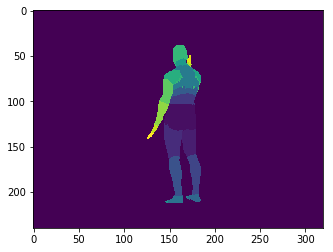

In [119]:
plt.imshow(image)

In [5]:
def find_crops(im,perc_w =0.1, perc_h=0.1):
    shapy = im.shape
    left = []
    right = []
    top = []
    bottom = []

    for i in range(shapy[0]):
        for j in range(shapy[1]):
            if im[i,j] != 0:
                left.append(j)
                break
        for j in range(shapy[1]-1,-1,-1):
            if im[i,j] != 0:
                right.append(j)
                break

    for j in range(shapy[1]):
        for i in range(shapy[0]):
            if im[i,j] != 0:
                top.append(i)
                break
        for i in range(shapy[0]-1,-1,-1):
            if im[i,j] != 0:
                bottom.append(i)
                break
    try:
        f_left = np.min(left)
        f_right = np.max(right)
        f_top = np.min(top)
        f_bottom = np.max(bottom)

        width = f_right -f_left
        height = f_bottom -f_top

        wth_plus = width*perc_w
        hgt_plus= height*perc_h

        f_left = int(round(f_left - wth_plus,0))
        f_right = int(round(f_right + wth_plus,0))
        f_top = int(round(f_top - hgt_plus,0))
        f_bottom = int(round(f_bottom + hgt_plus,0))

        new_w = f_right - f_left
        new_h = f_bottom - f_top

        if new_h > new_w:
            center = f_left + new_w/2
            f_left = int(math.ceil(center - new_h/2))
            f_right = int(math.ceil(center + new_h/2))
        else:
            center = f_top + new_h/2
            f_top = int(math.ceil(center - new_w/2))
            f_bottom = int(math.ceil(center + new_w/2))

        if f_left < 0: 
            residual = -f_left
            f_left = 0
            f_right = f_right + residual
        if f_right > shapy[1]-1: 
            residual = f_right -(shapy[1]-1)
            f_right = shapy[1]-1
            f_left = f_left -residual
        if f_top < 0:
            residual = -f_top
            f_top = 0
            f_bottom = f_bottom + residual
        if f_bottom > shapy[0]-1: 
            residual = f_bottom -(shapy[0]-1)
            f_bottom = shapy[0]-1
            f_top = f_top -residual

        if f_left < 0: f_left = 0
        if f_right > shapy[1]-1: f_right = shapy[1]-1
        if f_top < 0: f_top = 0
        if f_bottom > shapy[0]-1:f_bottom = shapy[0]-1
            
        if np.abs(f_right-f_left-(f_bottom-f_top)) == 1:
            if f_bottom-f_top > f_right-f_left:
                if f_left != 0:
                    f_left -= 1
                else:
                    f_right +=1
            if f_bottom-f_top < f_right-f_left:
                if f_top != 0:
                    f_top -= 1
                else:
                    f_bottom +=1  

        if f_right-f_left != f_bottom-f_top:
            if shapy[0] == np.min(shapy):
                if f_right-f_left > shapy[0]-1:
                    center = f_left + (f_right-f_left)/2
                    f_left = int(math.ceil(center - (shapy[0]-1)/2))
                    f_right = int(math.ceil(center +(shapy[0]-1)/2))
                if f_right-f_left < shapy[0]-1:
                    if f_left == 0:
                        f_right = shapy[0]-1
                    if f_right == shapy[1]-1:
                        f_left = f_left - (shapy[0]-(f_right-f_left))
            if shapy[1] == np.min(shapy):
                if f_bottom-f_top > shapy[1]:

                    center = f_top + (f_bottom-f_top)/2
                    f_top = int(math.ceil(center - (shapy[1]-1)/2))
                    f_bottom= int(math.ceil(center +(shapy[1]-1)/2))
                if f_bottom-f_top < shapy[1]-1:
                    if f_top == 0:
                        f_bottom = shapy[1]-1
                    if f_bottom == shapy[0]-1:
                        f_top = f_top - (shapy[1]-(f_bottom-f_top))


    except ValueError:
        if shapy[0] == np.min(shapy):
            f_left = 0
            f_right = shapy[0]-1
            f_bottom = shapy[0]-1
            f_top = 0
        if shapy[1]== np.min(shapy):
            f_left = 0
            f_right = shapy[1]-1
            f_bottom = shapy[1]-1
            f_top = 0
        
    assert f_right-f_left == f_bottom-f_top
    
    return f_left,f_top,f_right,f_bottom

def crop(im, f_left,f_top,f_right, f_bottom):
    new_im = im[f_top:f_bottom, f_left:f_right]
    return new_im

def resizeim(new_im, shapy):
    final_im = sc.misc.imresize(new_im, shapy, interp="nearest")
    return final_im


126 38 184 212
51 21 259 229
51 21 259 229
208 208
(208, 208)


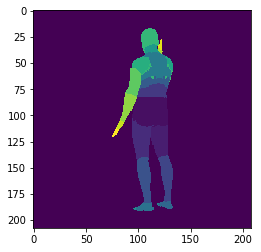

In [157]:
l,t,r,b = find_crops(im_2['segm_1'])
new_im =crop(im_2['segm_1'],l,t,r,b)
print(new_im.shape)
plt.imshow(new_im)

(240, 320)
(208, 208)
______________________________


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:92: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


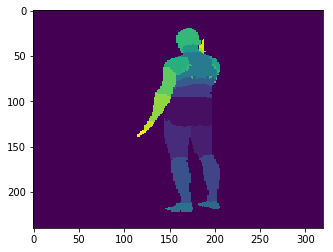

In [132]:
final_im = resizeim(new_im, im_2['segm_1'].shape)
plt.imshow(final_im)

In [133]:
im_2_true = imageio.imread('SURREAL/cmu/train_complete/run0/sample/01_01_c0001_1.jpg')

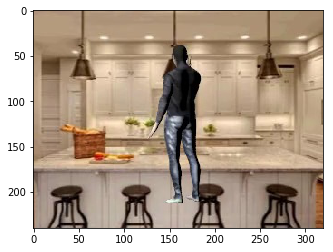

In [134]:
plt.imshow(im_2_true)

208 208
(208, 208, 3)


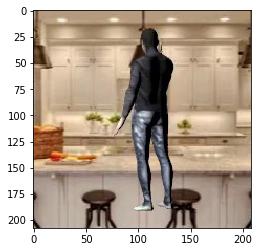

In [135]:
new_im_true = crop(im_2_true,l,t,r,b)
print(new_im_true.shape)
plt.imshow(new_im_true)

(240, 320, 3)
(208, 208, 3)
______________________________


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:92: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
Exception ignored in: <bound method Image.__del__ of <PIL.Image.Image image mode=L size=0x239 at 0x7FB8AAEB50F0>>
Traceback (most recent call last):
  File "/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/PIL/Image.py", line 586, in __del__
    def __del__(self):
KeyboardInterrupt


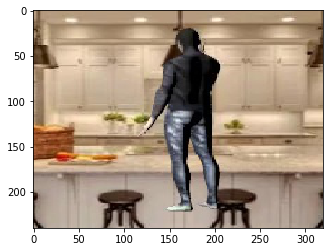

In [136]:
final_im_true = resizeim(new_im_true,im_2_true.shape)
plt.imshow(final_im_true)

In [30]:
imageio.imsave(os.path.join("./SURREAL/cropped/","true_ground.jpg"),image)
imageio.imsave(os.path.join("./SURREAL/cropped/","cropped_ground.jpg"),new_im)
imageio.imsave(os.path.join("./SURREAL/cropped/","resized_ground.jpg"),final_im)
imageio.imsave(os.path.join("./SURREAL/cropped/","true_image.jpg"),im_2_true)
imageio.imsave(os.path.join("./SURREAL/cropped/","cropped_image.jpg"),new_im_true)
imageio.imsave(os.path.join("./SURREAL/cropped/","resized_image.jpg"),final_im_true)


# Transform (crop and resize) and create new cluster from previous

In [129]:
obj_dir = "./SURREAL/cmu/cluster_train/annotations/"
final_dir = "./SURREAL/cmu/cluster_mod_train/"

In [37]:
def new_cluster(obj_dir, final_dir, shape = (320,320)):
    long = len(os.listdir(obj_dir))
    print("-"*10,long)
    count = 0
    for i in os.listdir(obj_dir):
        try:
            im = imageio.imread(os.path.join(obj_dir, i))
            l,t,r,b = find_crops(im)
            new_im = crop(im,l,t,r,b)
            final_im = resizeim(new_im, shape)
            imageio.imsave(os.path.join(final_dir,"annotations", i), final_im)
            
            if not i.startswith("ung"):
                name_1 = i.split("_")
                name_  = "_".join(name_1[:3]) + "_" + name_1[4]
            else:
                name_1 = i.split("_")
                name_  = "_".join(name_1[:4]) + "_" + name_1[5]
                
            obj_dir_split = obj_dir.split("/")
            
            if len(obj_dir_split)>6:
                namei = name_.split(".")
                name_ = namei[0] +"."+"jpg"
                im_name = os.path.join("/".join(obj_dir_split[:5]),"sample", name_)
            else:
                namei = name_.split(".")
                name_ = namei[0] +"."+"jpg"
                im_name = os.path.join("/".join(obj_dir_split[:4]),"sample", name_)
            
            sample_image = imageio.imread(im_name)
            new_im = crop(sample_image,l,t,r,b)
            final_im = resizeim(new_im, shape)
            imageio.imsave(os.path.join(final_dir,"sample",name_),final_im)
            
        except ValueError:
            pass
        
        count +=1
        if count % 500 == 0: print(count)

In [ ]:
new_cluster(obj_dir, final_dir)

---------- 92961


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:136: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500


In [12]:
obj_dir = "./SURREAL/cmu/cluster_test/annotations/"
final_dir = "./SURREAL/cmu/cluster_mod_test/"

In [7]:
new_cluster(obj_dir, final_dir)

---------- 16965


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:136: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500


In [38]:
obj_dir = "./SURREAL/cmu/val_complete/run0/annotations/"
final_dir = "./SURREAL/cmu/cluster_mod_eval/"

In [39]:
new_cluster(obj_dir, final_dir)

---------- 15235


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:135: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
